In [1]:
"""
  --allele-column NAME  Input column name for alleles. Default: 'allele'
  --peptide-column NAME
                        Input column name for peptides. Default: 'peptide'
  --n-flank-column NAME
                        Column giving N-terminal flanking sequence. Default: 'n_flank'
  --c-flank-column NAME
                        Column giving C-terminal flanking sequence. Default: 'c_flank'
"""

"\n  --allele-column NAME  Input column name for alleles. Default: 'allele'\n  --peptide-column NAME\n                        Input column name for peptides. Default: 'peptide'\n  --n-flank-column NAME\n                        Column giving N-terminal flanking sequence. Default: 'n_flank'\n  --c-flank-column NAME\n                        Column giving C-terminal flanking sequence. Default: 'c_flank'\n"

In [49]:
import pandas as pd

df = pd.read_csv("nutm1-fusion-sequences.csv")

In [50]:
df.upstream_transcript.unique()

array(['MGA-207', 'BRD4-213', 'BRD3-201', 'MXD4-201', 'CIC-209',
       'SLC12A6-221', 'YAP1-201', 'NSD3-202'], dtype=object)

In [52]:
from collections import defaultdict
data = defaultdict(list)
lengths = [8, 9, 10, 11]
alleles = "HLA-A*11:01 HLA-A*02:01 HLA-A*01:01 HLA-A*03:01 HLA-A*24:02 HLA-B*07:02 HLA-B*08:01 HLA-B*44:02 HLA-B*44:03 HLA-B*35:01 HLA-C*03:04 HLA-C*04:01 HLA-C*05:01 HLA-C*06:02 HLA-C*07:01 HLA-C*07:02".split()
with open("fusion-spanning-peptide.csv", "w") as f:
    f.write("source,allele,peptide,peptide_length,n_flank,c_flank\n")
    for _, row in df.iterrows():
        source_name = (
            row["upstream_transcript"] + 
            ":exon" + 
            str(row["upstream_last_exon"]) + 
            "|" +
            row["downstream_transcript"] + 
            ":exon" + 
            str(row["downstream_first_exon"]))
        print(source_name)
        if row["junction_inside_codon"]:
            upseq, jxn, downseq = row["protein_upstream"], row["protein_junction"], row["protein_downstream"]
        else:
            jxn = ""
            upseq, downseq = row["protein_upstream"], row["protein_downstream"]

        if len(jxn) == 0 or not row["junction_mutant_residue"]:
            upseq = upseq + jxn
            # only leave junction if it's mutant
            jxn = ""
  
        print(upseq)
        print(jxn)
        print(downseq)
        for n in lengths:
            if len(jxn) == 1:
                start = 0
            else:
                start = 1
            if len(jxn) == 1:
                end = n
            else:
                end = n
            for i in range(start, end):
                if i == 0:
                    up = ""
                    n_term = upseq[-5:]
                else:
                    up = upseq[-i:]
                    n_term = upseq[-(5 + i):-i]

                if len(jxn) == 1:
                    peptide = up + jxn + downseq[:(n-i- 1)]
                    c_term = downseq[(n-i-1):(n-i+4)]
                else:
                    peptide = up + downseq[:(n-i)]
                    c_term = downseq[(n-i):(n-i+5)]
                print(n, i, peptide, len(peptide), n_term, c_term)

                assert len(peptide) == n
                assert len(c_term) == 5
                assert len(n_term) == 5
                for allele in alleles:
                    # f.write("source,allele,peptide,peptide_length,n_flank,c_flank\n")
                    f.write(source_name + ",")
                    f.write(allele + ",")
                    f.write(peptide + ",")
                    f.write(str(len(peptide)) + ",")
                    f.write(n_term + ",")
                    f.write(c_term + "\n")
                    

MGA-207:exon22|NUTM1-203:exon3
MEEKQQIILANQDGGTVAGAAPTFFVILKQPGNGKTDQGILVTNQDACALASSVSSPVKSKGKICLPADCTVGGITVTLDNNSMWNEFYHRSTEMILTKQGRRMFPYCRYWITGLDSNLKYILVMDISPVDNHRYKWNGRWWEPSGKAEPHVLGRVFIHPESPSTGHYWMHQPVSFYKLKLTNNTLDQEGHIILHSMHRYLPRLHLVPAEKAVEVIQLNGPGVHTFTFPQTEFFAVTAYQNIQITQLKIDYNPFAKGFRDDGLNNKPQRDGKQKNSSDQEGNNISSSSGHRVRLTEGQGSEIQPGDLDPLSRGHETSGKGLEKTSLNIKRDFLGFMDTDSALSEVPQLKQEISECLIASSFEDDSRVASPLDQNGSFNVVIKEEPLDDYDYELGECPEGVTVKQEETDEETDVYSNSDDDPILEKQLKRHNKVDNPEADHLSSKWLPSSPSGVAKAKMFKLDTGKMPVVYLEPCAVTRSTVKISELPDNMLSTSRKDKSSMLAELEYLPTYIENSNETAFCLGKESENGLRKHSPDLRVVQKYPLLKEPQWKYPDISDSISTERILDDSKDSVGDSLSGKEDLGRKRTTMLKIATAAKVVNANQNASPNVPGKRGRPRKLKLCKAGRPPKNTGKSLISTKNTPVSPGSTFPDVKPDLEDVDGVLFVSFESKEALDIHAVDGTTEESSSLQASTTNDSGYRARISQLEKELIEDLKTLRHKQVIHPGLQEVGLKLNSVDPTMSIDLKYLGVQLPLAPATSFPFWNLTGTNPASPDAGFPFVSRTGKTNDFTKIKGWRGKFHSASASRNEGGNSESSLKNRSAFCSDKLDEYLENEGKLMETSMGFSSNAPTSPVVYQLPTKSTSYVRTLDSVLKKQSTISPSTSYSLKPHSVPPVSRKAKSQNRQATFSGRTKSSYKSILPYPVSPKQKYSHVILGDKVTKNSSGIISENQANNFVVPTLDENIFPKQIS

8 6 TTTAGRFM 8 KKANS EFEAE
8 7 STTTAGRF 8 AKKAN MEFEA
9 1 RFMEFEAEE 9 TTTAG MQIQN
9 2 GRFMEFEAE 9 STTTA EMQIQ
9 3 AGRFMEFEA 9 NSTTT EEMQI
9 4 TAGRFMEFE 9 ANSTT AEEMQ
9 5 TTAGRFMEF 9 KANST EAEEM
9 6 TTTAGRFME 9 KKANS FEAEE
9 7 STTTAGRFM 9 AKKAN EFEAE
9 8 NSTTTAGRF 9 PAKKA MEFEA
10 1 RFMEFEAEEM 10 TTTAG QIQNT
10 2 GRFMEFEAEE 10 STTTA MQIQN
10 3 AGRFMEFEAE 10 NSTTT EMQIQ
10 4 TAGRFMEFEA 10 ANSTT EEMQI
10 5 TTAGRFMEFE 10 KANST AEEMQ
10 6 TTTAGRFMEF 10 KKANS EAEEM
10 7 STTTAGRFME 10 AKKAN FEAEE
10 8 NSTTTAGRFM 10 PAKKA EFEAE
10 9 ANSTTTAGRF 10 APAKK MEFEA
11 1 RFMEFEAEEMQ 11 TTTAG IQNTQ
11 2 GRFMEFEAEEM 11 STTTA QIQNT
11 3 AGRFMEFEAEE 11 NSTTT MQIQN
11 4 TAGRFMEFEAE 11 ANSTT EMQIQ
11 5 TTAGRFMEFEA 11 KANST EEMQI
11 6 TTTAGRFMEFE 11 KKANS AEEMQ
11 7 STTTAGRFMEF 11 AKKAN EAEEM
11 8 NSTTTAGRFME 11 PAKKA FEAEE
11 9 ANSTTTAGRFM 11 APAKK EFEAE
11 10 KANSTTTAGRF 11 KAPAK MEFEA
MXD4-201:exon5|NUTM1-203:exon3
MELNSLLILLEAAEYLERRDREAEHGYASVLPFDGDFAREKTKAAGLVRKAPNNRSSHNELEKHRRAKLRLYLEQLKQLVPLGPDSTRHTT

10 2 SASALPGPDM 10 MMNSA SMKPS
10 3 ASASALPGPD 10 NMMNS MSMKP
10 4 SASASALPGP 10 QNMMN DMSMK
10 5 NSASASALPG 10 QQNMM PDMSM
10 6 MNSASASALP 10 VQQNM GPDMS
10 7 MMNSASASAL 10 PVQQN PGPDM
10 8 NMMNSASASA 10 PPVQQ LPGPD
10 9 QNMMNSASAS 10 SPPVQ ALPGP
11 1 ASALPGPDMSM 11 MNSAS KPSAA
11 2 SASALPGPDMS 11 MMNSA MKPSA
11 3 ASASALPGPDM 11 NMMNS SMKPS
11 4 SASASALPGPD 11 QNMMN MSMKP
11 5 NSASASALPGP 11 QQNMM DMSMK
11 6 MNSASASALPG 11 VQQNM PDMSM
11 7 MMNSASASALP 11 PVQQN GPDMS
11 8 NMMNSASASAL 11 PPVQQ PGPDM
11 9 QNMMNSASASA 11 SPPVQ LPGPD
11 10 QQNMMNSASAS 11 TSPPV ALPGP
YAP1-201:exon3|NUTM1-203:exon6
MDPGQQPPPQPAPQGQGQPPSQPPQGQGPPSGPGQPAPAATQAAPQAPPAGHQIVHVRGDSETDLEALFNAVMNPKTANVPQTVPMRLRKLPDSFFKPPEPKSHSRQASTDAGTAGALTPQHVRAHSSPASLQLGAVSPGTLTPTGVVSGPAATPTAQHLRQSSFEIPDDVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPRKAMLSQMNVTAPTSPPVQQNMMNSASV

YIPKKAASKTRAPRRRQRKAQRPPAPEAPKEIPPEAVKEYVDIMEWLVGTHLATGESDGKQEEEGQQQEEEGMYPDPGLLSYINELCSQKVFVSKVEAVIHPQFLADLLSPEKQRDPLALIEELEQEEGLTLAQLVQKRLMALEEEEDAEAPPSFSGAQLDSSPSGSV

In [31]:
!head fusion-spanning-peptide.csv

source,allele,peptide,peptide_length,n_flank,c_flank
BRD3-201:exon9|NUTM1-203:exon4,HLA-A*11:01,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-A*02:01,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-A*01:01,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-A*03:01,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-A*24:02,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-B*07:02,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-B*08:01,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-B*44:02,SPVLRSLA,8,TTTAG,RLKPT
BRD3-201:exon9|NUTM1-203:exon4,HLA-B*44:03,SPVLRSLA,8,TTTAG,RLKPT


In [53]:
! mhcflurry-predict fusion-spanning-peptide.csv --out fusion-junction-peptide-predictions.csv

Forcing tensorflow backend.
2022-10-21 18:06:40.809345: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-10-21 18:06:40.810075: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Read input CSV with 16992 rows, columns are: source, allele, peptide, peptide_length, n_flank, c_flank
Predicting processing.
  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/iskander/miniconda3/lib/python3.8/site-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/Users/iskander/miniconda3/lib/python3.8/site-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are

In [54]:
df_pred = pd.read_csv("fusion-junction-peptide-predictions.csv")

In [55]:
df_pred

,source,allele,peptide,peptide_length,n_flank,c_flank,mhcflurry_n_flank,mhcflurry_c_flank,mhcflurry_affinity,mhcflurry_affinity_percentile,mhcflurry_processing_score,mhcflurry_presentation_score,mhcflurry_presentation_percentile
0,MGA-207:exon22|NUTM1-203:exon3,HLA-A*11:01,ASALPGPD,8,AVALP,MSMKP,AVALP,MSMKP,31872.006360,44.005250,0.005850,0.002731,100.000000
1,MGA-207:exon22|NUTM1-203:exon3,HLA-A*02:01,ASALPGPD,8,AVALP,MSMKP,AVALP,MSMKP,31246.893075,53.486625,0.005850,0.002784,100.000000
2,MGA-207:exon22|NUTM1-203:exon3,HLA-A*01:01,ASALPGPD,8,AVALP,MSMKP,AVALP,MSMKP,32023.631664,43.368875,0.005850,0.002719,100.000000
3,MGA-207:exon22|NUTM1-203:exon3,HLA-A*03:01,ASALPGPD,8,AVALP,MSMKP,AVALP,MSMKP,32640.393692,47.318250,0.005850,0.002669,100.000000
4,MGA-207:exon22|NUTM1-203:exon3,HLA-A*24:02,ASALPGPD,8,AVALP,MSMKP,AVALP,MSMKP,32320.269423,62.537500,0.005850,0.002694,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16987,NSD3-202:exon7|NUTM1-203:exon6,HLA-C*04:01,SPEATSGSTVY,11,TQSVS,IPKKA,TQSVS,IPKKA,8773.655512,4.176625,0.060283,0.011690,20.232255
16988,NSD3-202:exon7|NUTM1-203:exon6,HLA-C*05:01,SPEATSGSTVY,11,TQSVS,IPKKA,TQSVS,IPKKA,6357.587637,5.324625,0.060283,0.015928,15.160951
16989,NSD3-202:exon7|NUTM1-203:exon6,HLA-C*06:02,SPEATSGSTVY,11,TQSVS,IPKKA,TQSVS,IPKKA,11398.578615,17.043000,0.060283,0.009084,24.579239
16990,NSD3-202:exon7|NUTM1-203:exon6,HLA-C*07:01,SPEATSGSTVY,11,TQSVS,IPKKA,TQSVS,IPKKA,12026.133788,9.687750,0.060283,0.008626,27.617391


In [56]:
df_top = df_pred[
    (df_pred.mhcflurry_affinity < 250) & 
    (df_pred.mhcflurry_affinity_percentile < 0.5) & 
    (df_pred.mhcflurry_affinity_percentile < 0.5) & 
    (df_pred.mhcflurry_processing_score >= 0.25)
]

In [57]:
df_top

,source,allele,peptide,peptide_length,n_flank,c_flank,mhcflurry_n_flank,mhcflurry_c_flank,mhcflurry_affinity,mhcflurry_affinity_percentile,mhcflurry_processing_score,mhcflurry_presentation_score,mhcflurry_presentation_percentile
74,MGA-207:exon22|NUTM1-203:exon3,HLA-C*03:04,VALPASAL,8,VAGSA,PGPDM,VAGSA,PGPDM,39.597314,0.066875,0.449768,0.909084,0.107174
197,MGA-207:exon22|NUTM1-203:exon3,HLA-B*07:02,AVALPASAL,9,QVAGS,PGPDM,QVAGS,PGPDM,63.932298,0.184750,0.475086,0.873504,0.164103
202,MGA-207:exon22|NUTM1-203:exon3,HLA-C*03:04,AVALPASAL,9,QVAGS,PGPDM,QVAGS,PGPDM,38.411503,0.057625,0.475086,0.918966,0.091875
707,MGA-207:exon22|NUTM1-203:exon6,HLA-A*03:01,ALPVYIPKK,9,AGSAV,AASKT,AGSAV,AASKT,74.263562,0.294000,0.667728,0.925460,0.083478
720,MGA-207:exon22|NUTM1-203:exon6,HLA-A*11:01,VALPVYIPK,9,VAGSA,KAASK,VAGSA,KAASK,25.878545,0.023875,0.888283,0.987679,0.002065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,NSD3-202:exon7|NUTM1-203:exon6,HLA-A*03:01,SGSTVYIPK,9,SPEAT,KAASK,SPEAT,KAASK,94.366828,0.380000,0.461023,0.817530,0.251005
16768,NSD3-202:exon7|NUTM1-203:exon6,HLA-A*11:01,TSGSTVYIPK,10,SSPEA,KAASK,SSPEA,KAASK,42.700367,0.163000,0.295599,0.837918,0.218288
16851,NSD3-202:exon7|NUTM1-203:exon6,HLA-A*03:01,TVYIPKKAASK,11,ATSGS,TRAPR,ATSGS,TRAPR,119.487979,0.461125,0.303973,0.662108,0.503804
16928,NSD3-202:exon7|NUTM1-203:exon6,HLA-A*11:01,ATSGSTVYIPK,11,VSSPE,KAASK,VSSPE,KAASK,30.781700,0.061750,0.612873,0.959609,0.034402


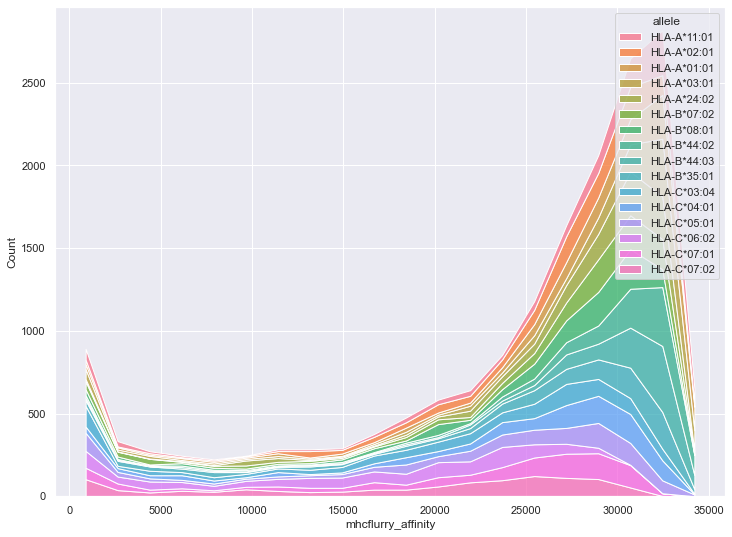

In [58]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(12,9)})

p = sns.histplot(
    data=df_pred, x="mhcflurry_affinity", 
    hue="allele", bins=20, 
    stat="count", 
    multiple="stack", 
    element="poly", 
    hue_order=alleles)
fig = p.get_figure()
fig.savefig('all-fusion-spanning-peptide-predictions.png')

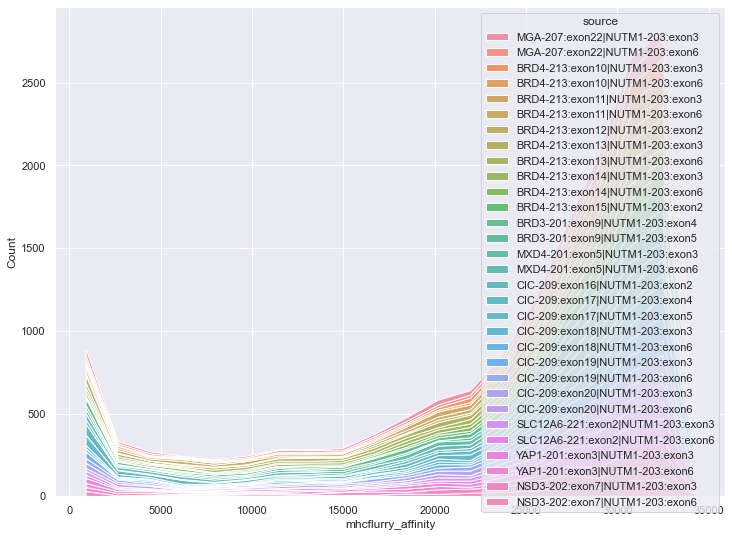

In [59]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(12,9)})

p = sns.histplot(
    data=df_pred, x="mhcflurry_affinity", 
    hue="source", bins=20, 
    stat="count", 
    multiple="stack", 
    element="poly")
fig = p.get_figure()
fig.savefig('all-fusion-spanning-peptide-predictions-by-source.png')

In [48]:
df_pred.source.unique()

array(['BRD3-201:exon9|NUTM1-203:exon4', 'CIC-209:exon17|NUTM1-203:exon5'],
      dtype=object)

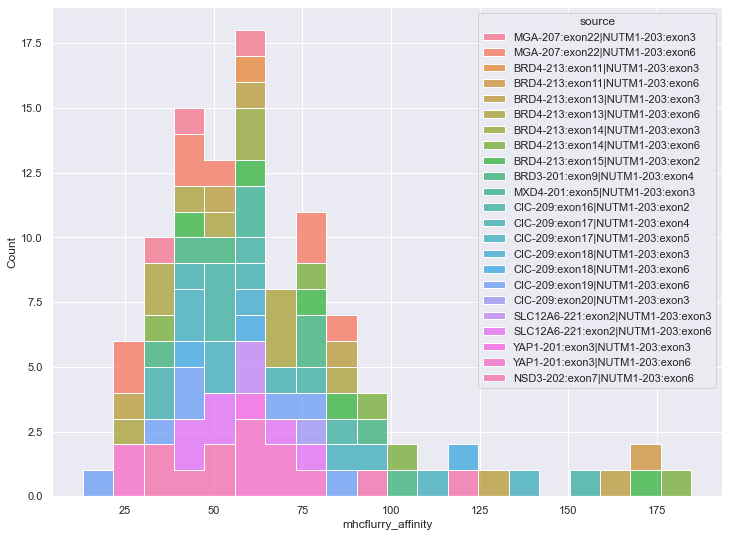

In [63]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(12,9)})

p = sns.histplot(
    data=df_top, x="mhcflurry_affinity", 
    hue="source", bins=20, 
    stat="count", 
    multiple="stack", 
    element="step")
fig = p.get_figure()
fig.savefig('top-fusion-spanning-peptide-predictions-by-source.png')